# File to prepare relative heights 
Run that later on geobigdata computer 

This file reads in the whole dataset with all labels and then creates an additional column with nly the relative heights

Change to Python 2: All print commands 

In [13]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
# Define a data frame with all my data# Define  
FILE_PATH = r"../DATA/Cassette_idclass"
FILE_NAME = r"/Cassette_GT_allattributes.txt"
df = pd.read_csv(FILE_PATH+FILE_NAME, delimiter=',')
df.head()

,//X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range
0,1.200000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.903383e+03,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0.0,303040192.0,5.17300
2,1.903405e+03,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0.0,303040192.0,5.15375
3,1.903428e+03,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0.0,303040192.0,5.13200
4,1.903452e+03,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0.0,303040192.0,5.11050


In [4]:
# Rename the column 
df = df.rename(index=str, columns={"//X": "X"})
# Obtain number of observations
n = df.iloc[0,0]
# Get rid of first line with number of observations
df = df.drop(df.index[0])

In [5]:
# Test whether there are any NAN values in the data set 
if df.isnull().values.any() == False:
    print("No Nan in this data set")
else:
    print("There are Nan in this dataset")

No Nan in this data set


In [6]:
df.head()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range
1,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0.0,303040192.0,5.17300
2,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0.0,303040192.0,5.15375
3,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0.0,303040192.0,5.13200
4,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0.0,303040192.0,5.11050
5,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0.0,303040192.0,5.08925


In [7]:
# Create a new column with relative height 
# This will give us positive rel_height if the point is higher, and negative rel_height if point is lower 
df['relative_height']=df['Z'] - df['z_origin']
df.head()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height
1,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0.0,303040192.0,5.17300,-2.334401
2,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0.0,303040192.0,5.15375,-2.335705
3,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0.0,303040192.0,5.13200,-2.335850
4,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0.0,303040192.0,5.11050,-2.335575
5,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0.0,303040192.0,5.08925,-2.335727


In [19]:
df.to_csv(FILE_PATH+'/Cassette_relativeHeight.csv')

In [9]:
df["class"].value_counts()

203000000.0    7027016
202020000.0    3196982
202030000.0     907894
303040192.0     368271
304020000.0     202728
202040000.0      64303
202010000.0      60460
0.0              52508
303030304.0      38330
302020288.0      19912
302030400.0      18425
303020192.0      15051
304040000.0       9403
303020288.0       4065
303020608.0       3848
302020416.0       2478
301000000.0       2306
303030208.0       2001
302020608.0       1355
302020992.0       1200
303020000.0       1035
302020896.0        429
Name: class, dtype: int64

In [10]:
class_column = df["class"].astype(int)

In [31]:
class_column.value_counts()

203000000    7027016
202020000    3196982
202030000     907894
303040192     368271
304020000     202728
202040000      64303
202010000      60460
0              52508
303030304      38330
302020288      19912
302030400      18425
303020192      15051
304040000       9403
303020288       4065
303020608       3848
302020416       2478
301000000       2306
303030208       2001
302020608       1355
302020992       1200
303020000       1035
302020896        429
Name: class, dtype: int64

In [34]:
# There are 22 classes in the whole dataset 
# Save all classes in a numpy array 
all_values = class_column.value_counts().keys()
all_values.values.sort()
all_values

Int64Index([        0, 202010000, 202020000, 202030000, 202040000, 203000000,
            301000000, 302020288, 302020416, 302020608, 302020896, 302020992,
            302030400, 303020000, 303020192, 303020288, 303020608, 303030208,
            303030304, 303040192, 304020000, 304040000],
           dtype='int64')

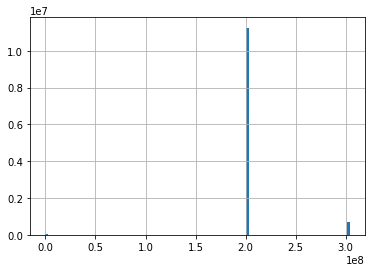

(<matplotlib.axes._subplots.AxesSubplot at 0x18803569518>, None)

In [18]:
class_column.hist(bins=100), plt.show()

In [48]:
lut_classes = all_values.astype(float)
lut_classnames = ["unclassified", "other_ground", "road", "sidewalk", "curb", "building", "other_object", 
                  "x1", "x2", "x3", "x4", "x5", "grid", "pedestrian", "x6", "x7", "x8", "x9", "x10", 
                  "x11", "tree", "potted_plant"]

In [ ]:
302020288
302020416
302020608
302020896
302020992

303020192
303020288
303020608
303030208

303030304
303040192

In [70]:
lut_classes


Float64Index([        0.0, 202010000.0, 202020000.0, 202030000.0, 202040000.0,
              203000000.0, 301000000.0, 302020288.0, 302020416.0, 302020608.0,
              302020896.0, 302020992.0, 302030400.0, 303020000.0, 303020192.0,
              303020288.0, 303020608.0, 303030208.0, 303030304.0, 303040192.0,
              304020000.0, 304040000.0],
             dtype='float64')

In [50]:
type(lut_classes[1])

numpy.float64

In [51]:
df["class"].head()

1    303040192.0
2    303040192.0
3    303040192.0
4    303040192.0
5    303040192.0
Name: class, dtype: float64

In [53]:
df["class"].iloc[1]

303040192.0

In [71]:
df["class_category"] = df["class"]

In [72]:
df["class_category"].head()

1    303040192.0
2    303040192.0
3    303040192.0
4    303040192.0
5    303040192.0
Name: class_category, dtype: float64

In [73]:
# Label those above 5 as 5
# inplace = True is like in C++ where we overwrite an object rather than creating a copy of it
# so we dont return anything, but we overwrite the object we operate on 
# Where smaller than five, do nothing; where this is not true replace with 5.0
df["class_category"].where(df["class_category"] != 0.0, "unclassified", inplace=True)
df["class_category"].where(df["class_category"] != 202010000.0, "other_ground", inplace=True)
df["class_category"].where(df["class_category"] != 202020000.0, "road", inplace=True)

In [76]:
df["class_category"].value_counts()

203000000.0     7027016
road            3196982
202030000.0      907894
303040192.0      368271
304020000.0      202728
202040000.0       64303
other_ground      60460
unclassified      52508
303030304.0       38330
302020288.0       19912
302030400.0       18425
303020192.0       15051
304040000.0        9403
303020288.0        4065
303020608.0        3848
302020416.0        2478
301000000.0        2306
303030208.0        2001
302020608.0        1355
302020992.0        1200
303020000.0        1035
302020896.0         429
Name: class_category, dtype: int64

In [79]:
# Define LUT
lut_classes = all_values.astype(float)
lut_classnames = ["unclassified", "other_ground", "road", "sidewalk", "curb", "building", "other_object", 
                  "x1", "x2", "x3", "x4", "x5", "grid", "pedestrian", "x6", "x7", "x8", "x9", "x10", 
                  "x11", "tree", "potted_plant"]
# Create a new column in the df 
df["class_category"] = df["class"]
# Modify that column to visualise it 
if len(lut_classes) == len(lut_classnames):
    for count, elem in enumerate(lut_classes):
        df["class_category"].where(df["class_category"] != elem, lut_classnames[count], inplace=True)     
else:
    print("LUT must have same length")

In [80]:
df["class_category"].value_counts()

building        7027016
road            3196982
sidewalk         907894
x11              368271
tree             202728
curb              64303
other_ground      60460
unclassified      52508
x10               38330
x1                19912
grid              18425
x6                15051
potted_plant       9403
x7                 4065
x8                 3848
x2                 2478
other_object       2306
x9                 2001
x3                 1355
x5                 1200
pedestrian         1035
x4                  429
Name: class_category, dtype: int64

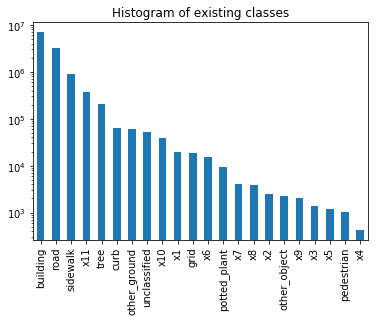

In [92]:
df['class_category'].value_counts().plot(kind='bar', logy=True, title="Histogram of existing classes"), plt.show();


# Remove the points with class "unclassified" 
they belong to the class "not classified yet" and could therefore be anything 
I think I would add errors to my classifier if I used that as well 

In [93]:
df.head()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height,class_category
1,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0.0,303040192.0,5.17300,-2.334401,x11
2,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0.0,303040192.0,5.15375,-2.335705,x11
3,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0.0,303040192.0,5.13200,-2.335850,x11
4,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0.0,303040192.0,5.11050,-2.335575,x11
5,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0.0,303040192.0,5.08925,-2.335727,x11


In [101]:
df = df[df["class"] != 0.0]

In [102]:
df["class"].value_counts()

203000000.0    7027016
202020000.0    3196982
202030000.0     907894
303040192.0     368271
304020000.0     202728
202040000.0      64303
202010000.0      60460
303030304.0      38330
302020288.0      19912
302030400.0      18425
303020192.0      15051
304040000.0       9403
303020288.0       4065
303020608.0       3848
302020416.0       2478
301000000.0       2306
303030208.0       2001
302020608.0       1355
302020992.0       1200
303020000.0       1035
302020896.0        429
Name: class, dtype: int64

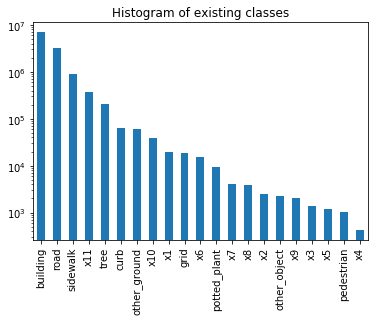

In [103]:
df['class_category'].value_counts().plot(kind='bar', logy=True, title="Histogram of existing classes"), plt.show();